1.1

In [7]:
#__init__(self, name) конструктор с обязательныым параметром метода self - ссылка на экземпляр класса
#super().__init__('irisha', 4)#функция полиморфного перекрытия, возвращает ссылку на родительский класс (можно передать параметры материнского класса)
import math
class trig:
    @staticmethod
    def cosx(x):
        return math.cos(x)

    @staticmethod
    def sinx(x):
        return math.sin(x)

    @staticmethod
    def tanx(x):
        return math.tan(x)

    @staticmethod
    def arcsinx(x):
        return math.asin(x)

    @staticmethod
    def arccosinx(x):
        return math.acos(x)

    @staticmethod
    def arctangenx(x):
        return math.atan(x)

    @staticmethod
    def degrees_to_radians(deg):
        return math.radians(deg)
a = trig()
b = 1
print(a.sinx(b))

0.8414709848078965


1.2.1

In [3]:
Tree = ['a', ['b', ['d', 'e']], ['c',['f', [],]]]
print("Корень дерева:", Tree[0])
print("Левое поддерево:", Tree[1])
print("Правое поддерево:", Tree[2])

Корень дерева: a
Левое поддерево: ['b', ['d', 'e']]
Правое поддерево: ['c', ['f', []]]


1.2.2

In [2]:
class Tree:
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
    def insert(self, value):
        if value < self.data:
            if self.left is None:
                self.left = Tree(value)
            else:
                self.left.insert(value)
        elif value > self.data:
            if self.right is None:
                self.right = Tree(value)
            else:
                self.right.insert(value)
    def PrintTree(self):
        if self.left:
            self.left.PrintTree()
        print(self.data, end=' ')
        if self.right:
            self.right.PrintTree()
tree = Tree(2)
tree.insert(4)
tree.insert(8)
tree.insert(16)
tree.PrintTree()

2 4 8 16 

1.3

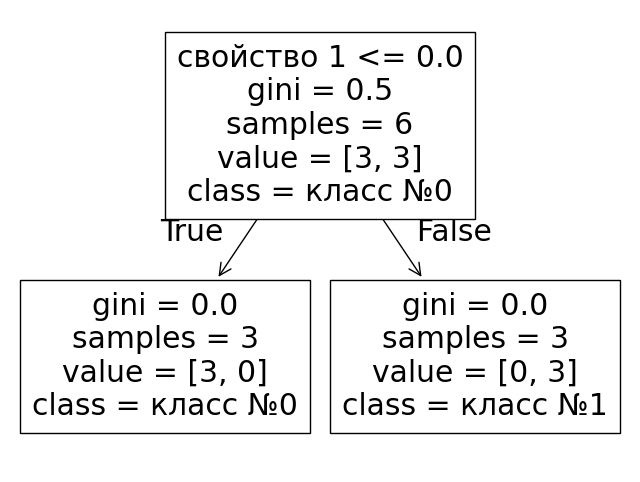

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]]) #данные (сопостовление классов и признаков на основе этого определение принадлежности к классу в будущем )
y = np.array([0, 0, 0, 1, 1, 1])
clf = DecisionTreeClassifier() #создание дерева
clf.fit(X, y)
plt.figure(figsize=(8, 6))
plot_tree(clf, feature_names=["свойство 1", "свойство 2"], class_names=["класс №0", "класс №1"])
plt.show()

1.4

Средняя абсолютная ошибка: 0.50
Среднеквадратичная ошибка: 0.43
Коэффициент детерминации: 0.34


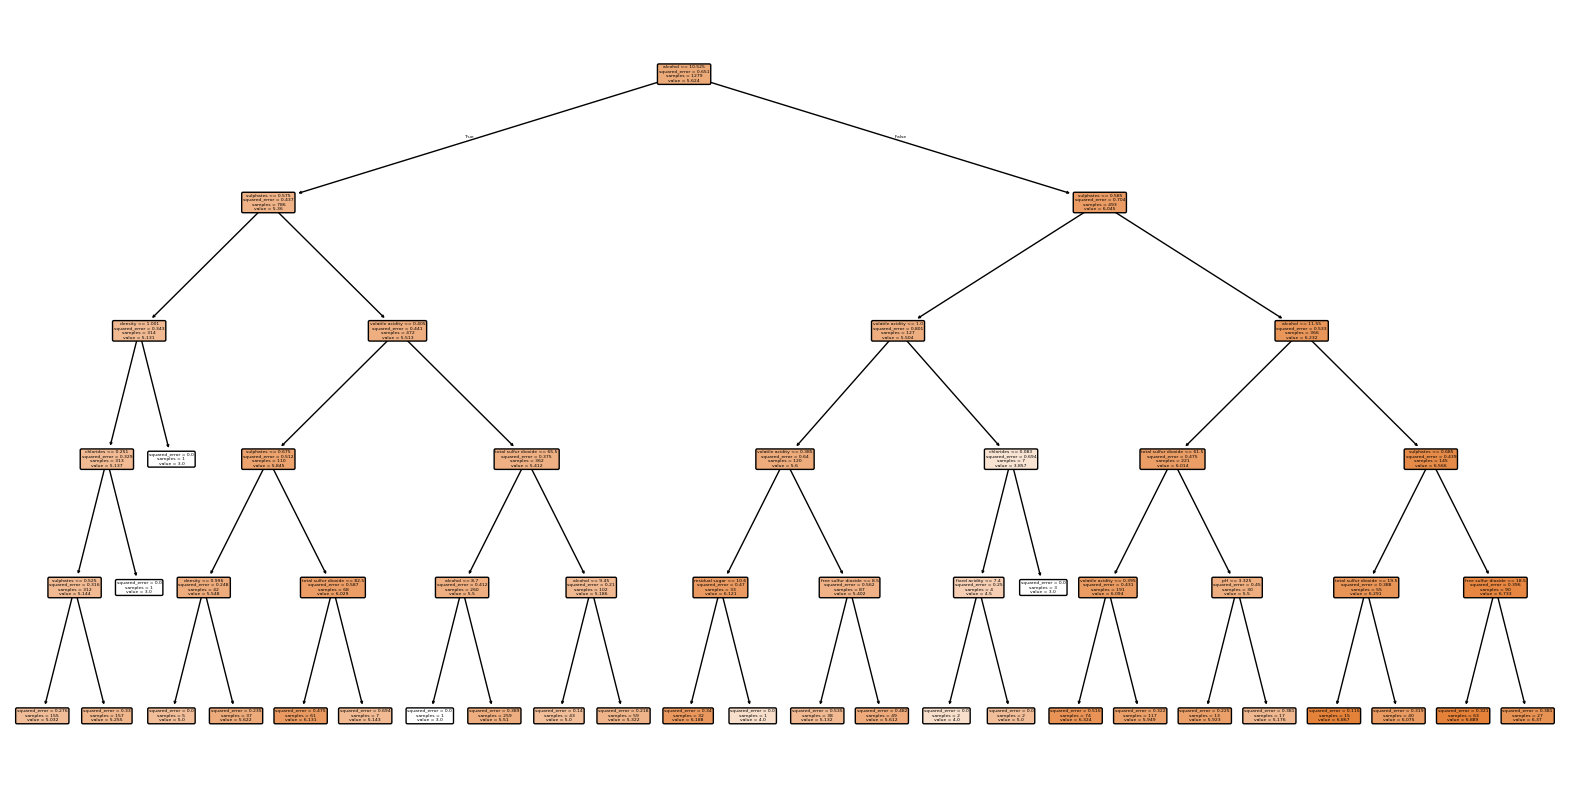

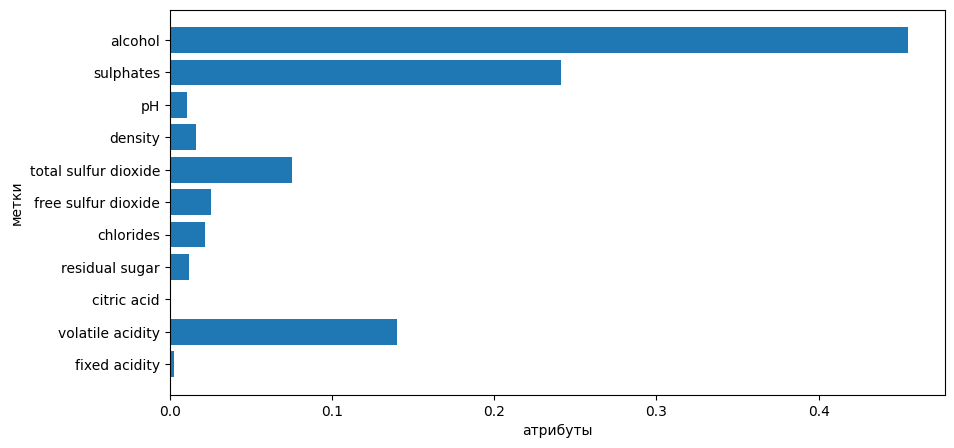

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
url = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv" #download
data = pd.read_csv(url)
X = data.drop(columns=["quality"])  # атрибуты
y = data["quality"]  #метка
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # по классике тестовая 20  (при 30% 0.51, 0.46, 0.28 при 20% лучше)
regressor = DecisionTreeRegressor(max_depth=5, random_state=42) # дерево решений
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test) # прогнозирование на тестовых
#оценка точности
mae = mean_absolute_error(y_test, y_pred);print(f"Средняя абсолютная ошибка: {mae:.2f}")
mse = mean_squared_error(y_test, y_pred);print(f"Среднеквадратичная ошибка: {mse:.2f}")
r2 = r2_score(y_test, y_pred);print(f"Коэффициент детерминации: {r2:.2f}")
#визуал
plt.figure(figsize=(20, 10))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True)
plt.figure(figsize=(10, 5))
plt.barh(X.columns, regressor.feature_importances_)
plt.xlabel("атрибуты")
plt.ylabel("метки")
plt.show()